In [63]:
import pandas as pd
from scipy import stats
import math
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('AB_test_data.csv')

In [14]:
df

,Variant,purchase_TF,date,id
0,A,False,2019-12-26,0x6f9421
1,A,False,2019-08-16,0x59d442
2,A,True,2019-03-18,0x6db8f8
3,A,False,2019-02-13,0x68245d
4,A,False,2019-09-28,0x28566e
...,...,...,...,...
54995,A,False,2019-06-19,0x451451
54996,A,False,2019-03-22,0x871d51
54997,A,False,2019-02-10,0x50d163
54998,B,False,2020-01-09,0x3544c4


In [15]:
df['Variant'].value_counts()

A    50000
B     5000
Name: Variant, dtype: int64

In [16]:
df_pop = df.loc[df['Variant'] == 'A']
df_sample = df.loc[df['Variant'] == 'B']

In [17]:
df_pop['purchase_TF'].value_counts()

False    42397
True      7603
Name: purchase_TF, dtype: int64

### Question 2. A/B Test

In [18]:
# Setting up null hypo

pop_t = df_pop['purchase_TF'].value_counts()[1]
pop_f = df_pop['purchase_TF'].value_counts()[0]

pop_port = pop_t/df_pop.shape[0]

In [19]:
pop_port

0.15206

In [20]:
df_sample['purchase_TF'].value_counts()

False    4019
True      981
Name: purchase_TF, dtype: int64

In [21]:
samp_t = df_sample['purchase_TF'].value_counts()[1]
samp_f = df_sample['purchase_TF'].value_counts()[0]

In [22]:
# Calculate p value

stats.binom_test((samp_t, samp_f), p=pop_port, alternative='two-sided')

5.04855132322832e-17

#### Manual Calculation for Z

In [1]:
# Sample p
981/5000

0.1962

In [68]:
# population p
7603/50000

0.15206

#### If Variant A and B are two samples

In [70]:
# p*

((50000 * 0.15206) + (5000 * 0.1962))/(50000 + 5000)

0.15607272727272728

In [71]:
(0.1962 - 0.15206)/math.sqrt((0.15607272727272728 * (1-0.15607272727272728))/(50000+5000))

28.523160969366018

In [75]:
(1 - stats.norm(0,1).cdf(28.523160969366018))*2

0.0

#### If Variant A  is population and B is the sample

In [73]:
(0.1962 - 0.15206)/math.sqrt((0.15206 * (1-0.15206))/(50000))

27.48699582798793

In [74]:
(1 - stats.norm(0,1).cdf(27.48699582798793))*2

0.0

#### Check if Time matters

In [26]:
df.groupby(['date','Variant','purchase_TF']).count()

id
date       Variant purchase_TF     
2019-01-01 A       False        114
                   True          21
2019-01-02 A       False         90
                   True          24
2019-01-03 A       False        102
...                             ...
2020-01-29 B       True          41
2020-01-30 A       False        119
                   True          18
           B       False        138
                   True          34

[850 rows x 1 columns]

In [28]:
df.dtypes

Variant        object
purchase_TF      bool
date           object
id             object
dtype: object

In [29]:
df['date'] = pd.to_datetime(df['date'])

In [44]:
df_date_count = df.loc[df['date'] >= '2020-01-01'].groupby(['date','Variant','purchase_TF']).count().reset_index()

In [45]:
df_date_count

,date,Variant,purchase_TF,id
0,2020-01-01,A,False,108
1,2020-01-01,A,True,12
2,2020-01-01,B,False,127
3,2020-01-01,B,True,33
4,2020-01-02,A,False,118
...,...,...,...,...
115,2020-01-29,B,True,41
116,2020-01-30,A,False,119
117,2020-01-30,A,True,18
118,2020-01-30,B,False,138


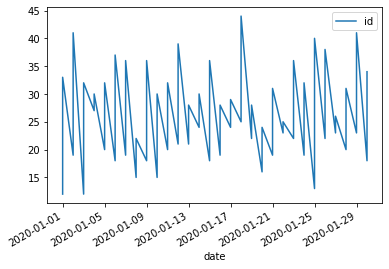

In [59]:
df_date_count[df_date_count['purchase_TF'] == True].plot(x = 'date', y = 'id',legend = 'Variant')

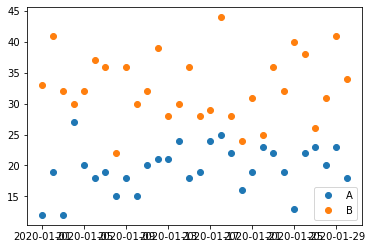

In [64]:
groups = df_date_count[df_date_count['purchase_TF'] == True].groupby("Variant")
for name, group in groups:
    plt.plot(group["date"], group["id"], marker="o", linestyle="", label=name)
plt.legend()


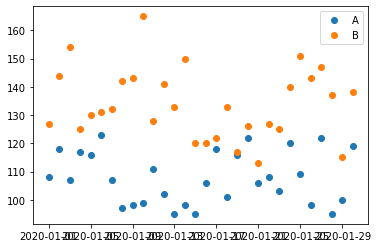

In [65]:
groups = df_date_count[df_date_count['purchase_TF'] == False].groupby("Variant")
for name, group in groups:
    plt.plot(group["date"], group["id"], marker="o", linestyle="", label=name)
plt.legend()


#### Did not find a clear seasonality behaviour

### Question 3. Optimal Sample Size

In [ ]:
# Assume variant A and B are two samples

def optimal_sample_size()